In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [15]:
df.drop(columns = ['Serial No.'],inplace=True)

In [16]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
x_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

if we are working on linear regression then the activation output will be linear

In [33]:
from re import S
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [36]:
training = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 25ms/step - loss: 0.8671 - val_loss: 0.8951
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7734 - val_loss: 0.8000
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6895 - val_loss: 0.7167
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6168 - val_loss: 0.6419
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5521 - val_loss: 0.5773
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4925 - val_loss: 0.5102
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4260 - val_loss: 0.4276
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3564 - val_loss: 0.3487
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2881 - val_loss: 0.2732
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2232 - val_loss: 0.2008
Epoch 11/100
8/8 [==========

In [37]:
y_pred = model.predict(x_test_scaled)

3/3 [==============================] - 0s 5ms/step


In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7384632708658376

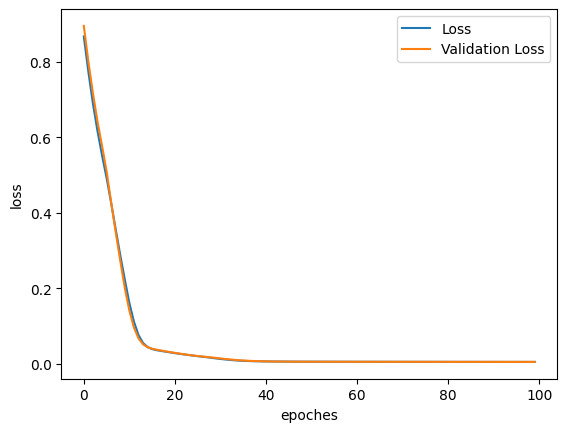

In [41]:
plt.plot(training.history['loss'], label='Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()